In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [5]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [8]:
cancer_df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
cancer_df['class'] = cancer.target

cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [11]:
cancer_df.shape

(569, 31)

Text(0, 0.5, 'mean radius')

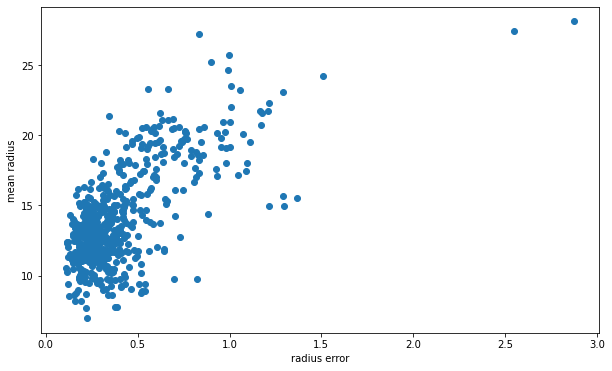

In [12]:
fig,  ax = plt.subplots(figsize =(10, 6))

plt.scatter(cancer_df['radius error'], cancer_df['mean radius'])

plt.xlabel('radius error')
plt.ylabel('mean radius')

Text(0, 0.5, 'worst fractal dimension')

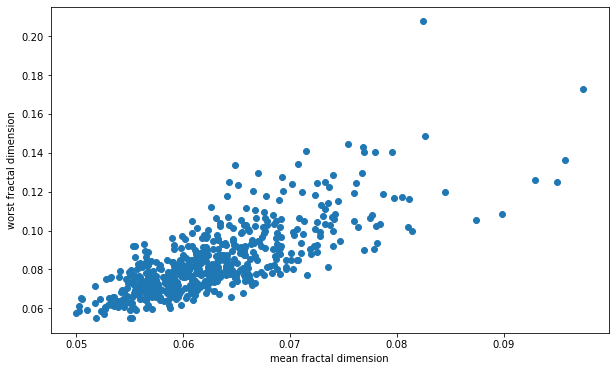

In [13]:
fig,  ax = plt.subplots(figsize =(10, 6))

plt.scatter(cancer_df['mean fractal dimension'], cancer_df['worst fractal dimension'])

plt.xlabel('mean fractal dimension')
plt.ylabel('worst fractal dimension')

In [15]:
cancer_df_subset = cancer_df[['mean radius',
                              'mean texture',
                              'mean perimeter',
                              'mean area',
                              'radius error',
                              'texture error',
                              'worst perimeter',
                              'worst area',
                              'class']]

In [16]:
cancer_corr = cancer_df_subset.corr()
cancer_corr

,mean radius,mean texture,mean perimeter,mean area,radius error,texture error,worst perimeter,worst area,class
mean radius,1.000000,0.323782,0.997855,0.987357,0.679090,-0.097317,0.965137,0.941082,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,0.275869,0.386358,0.358040,0.343546,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.691765,-0.086761,0.970387,0.941550,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.732562,-0.066280,0.959120,0.959213,-0.708984
radius error,0.679090,0.275869,0.691765,0.732562,1.000000,0.213247,0.719684,0.751548,-0.567134
texture error,-0.097317,0.386358,-0.086761,-0.066280,0.213247,1.000000,-0.102242,-0.083195,0.008303
worst perimeter,0.965137,0.358040,0.970387,0.959120,0.719684,-0.102242,1.000000,0.977578,-0.782914
worst area,0.941082,0.343546,0.941550,0.959213,0.751548,-0.083195,0.977578,1.000000,-0.733825
class,-0.730029,-0.415185,-0.742636,-0.708984,-0.567134,0.008303,-0.782914,-0.733825,1.000000


<AxesSubplot:>

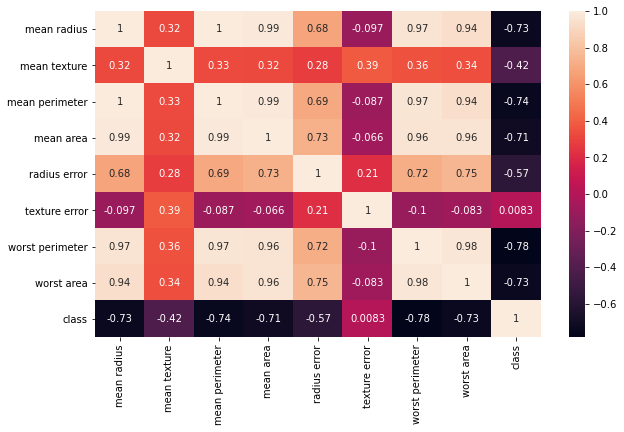

In [20]:
fig, ax = plt.subplots(figsize = (10, 6))

sns.heatmap(cancer_corr, annot = True)

In [24]:
x = cancer_df.drop('class', axis = 1)
y = cancer_df['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [25]:
classifier = LogisticRegression(solver = 'liblinear')
classifier.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [26]:
y_pred = classifier.predict(x_test)

In [27]:
pred_results = pd.DataFrame({'y_pred' : y_pred,
                            'Actual': y_test})
pred_results.head()

,y_pred,Actual
464,1,1
15,0,0
172,0,0
295,1,1
480,1,1


In [28]:
cancer_crosstab = pd.crosstab(pred_results['y_pred'], pred_results['Actual'])

cancer_crosstab

Actual,0,1
y_pred,,
0,41,1
1,1,71


In [30]:
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

print('accuracy score: ', acc)
print('precision score: ', prec)
print('recall score: ', recall)

accuracy score:  0.9824561403508771
precision score:  0.9861111111111112
recall score:  0.9861111111111112
